### This is a sample of work done to produce figures, results in the work. This is only a small portion of the work, intended to give a general idea of how this is done.

### Below are packages required + functions written for experiments

In [1]:
import numpy as np
import skgarden
import skmultiflow
import sys
import cython
import warnings
import sklearn
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

C:\Users\Nathan\anaconda3\envs\t\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Nathan\anaconda3\envs\t\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='la

In [2]:
from skgarden import MondrianForestClassifier
from skmultiflow.meta import AdaptiveRandomForestClassifier
from skmultiflow.data import AGRAWALGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skmultiflow.lazy import KNNClassifier
from skmultiflow.lazy import KNNADWINClassifier
from skmultiflow.bayes import NaiveBayes
from skmultiflow.data import ConceptDriftStream
from sklearn import datasets

In [3]:
from sklearn.ensemble import RandomForestClassifier
def OffRFtest(data, train_size):
    data_train = data[:train_size]
    X_train = data_train[:,:-1]
    y_train = data_train[:,-1]
    
    data_test = data[train_size:]
    X_test = data_test[:,:-1]
    y_test = data_test[:,-1]
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred, y_test

In [4]:
from sklearn.naive_bayes import GaussianNB

def OffBayestest(data, train_size):
    data_train = data[:train_size]
    X_train = data_train[:,:-1]
    y_train = data_train[:,-1]
    
    data_test = data[train_size:]
    X_test = data_test[:,:-1]
    y_test = data_test[:,-1]
    
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    return y_pred, y_test

In [5]:

from sklearn.neighbors import KNeighborsClassifier
def OffkNNtest(data, train_size, k):

    data_train = data[:train_size]
    X_train = data_train[:,:-1]
    y_train = data_train[:,-1]
    
    data_test = data[train_size:]
    X_test = data_test[:,:-1]
    y_test = data_test[:,-1]
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    return y_pred, y_test

In [6]:
def permutedata(data):
    data2 = 1.0*data
    l,_ = np.shape(data)
    r = np.random.permutation(l) - 1
    a = np.arange(0,l,1)
    data2[a]=data2[r]
    return data2

def ARFypredtrue(data):
    arf = AdaptiveRandomForestClassifier()
    l,_ = np.shape(data)
    X = data[:,:-1]
    y = data[:,-1]
    y_preds = np.zeros(l)
    for j in range(l):
        X_sample=X[j:j+1]
        y_sample=y[j:j+1]
        y_pred = arf.predict(X_sample)
        y_preds[j]=y_pred
        arf.partial_fit(X_sample, y_sample)
    return y_preds, y

def MFCypredtrue(data, classes):

    l,_ = np.shape(data)
    v = np.zeros(classes)
    for j in range(classes):
        v[j]=j

    mfc = MondrianForestClassifier() 
    mfc.partial_fit(np.array([data[0,:-1]]),np.array([data[0,-1]]), classes=v)
    y_preds = np.zeros(l-1)
    
    X = data[1:,:-1]
    y = data[1:,-1]
    
    for j in range(l-1):
        X_sample=X[j:j+1]
        y_sample=y[j:j+1]
        y_pred = mfc.predict(X_sample)
        y_preds[j]=y_pred
        mfc.partial_fit(X_sample, y_sample)
        
    return y_preds, y

def kNNypredtrue2(data, neighbours, window, leaf):

    knn = KNNClassifier(n_neighbors=neighbours, max_window_size=window, leaf_size=leaf) #default window =2000, leaf = 40
    l,_ = np.shape(data)
    y_preds = np.zeros(l)
   
    X = data[:,:-1]
    y = data[:,-1]
    
    for j in range(l):
        X_sample=X[j:j+1]
        y_sample=y[j:j+1]
        y_pred = knn.predict(X_sample)
        y_preds[j]=y_pred[0]
        knn.partial_fit(X_sample, y_sample)
        
    return y_preds, y

def kNNypredtrue(data, neighbours, window, leaf):

    knn_adwin = KNNADWINClassifier(n_neighbors=neighbours, max_window_size=window, leaf_size=leaf) #default window =2000, leaf = 40
    l,_ = np.shape(data)
    y_preds = np.zeros(l)
   
    X = data[:,:-1]
    y = data[:,-1]
    
    for j in range(l):
        X_sample=X[j:j+1]
        y_sample=y[j:j+1]
        y_pred = knn_adwin.predict(X_sample)
        y_preds[j]=y_pred[0]
        knn_adwin.partial_fit(X_sample, y_sample)
        
    return y_preds, y


def bayesypredtrue(data):
    l,_ = np.shape(data)
    X = data[:,:-1]
    y = data[:,-1]
    naive_bayes = NaiveBayes()
    y_preds = np.zeros(l)

    
    for j in range(l):
        X_sample=X[j:j+1]
        y_sample=y[j:j+1]
        y_pred = naive_bayes.predict(X_sample)
        y_preds[j]=y_pred[0]
        naive_bayes.partial_fit(X_sample, y_sample)
        
    return y_preds, y

In [9]:
def movacc(y_true, y_pred, window):
    k = np.shape(y_true)[0]
    movacc = np.zeros(k)
    for i in range(k):
        if i <= window:
            movacc[i]=accuracy_score(y_true[:i+1],y_pred[:i+1])
        else:
            movacc[i]=accuracy_score(y_true[i+1-window:i+1],y_pred[i+1-window:i+1])
    return movacc

def pastacc(y_true, y_pred):
    k = np.shape(y_true)[0]
    C = np.zeros(k)
    for i in range(k):
        C[i]=accuracy_score(y_true[:i+1],y_pred[:i+1]) #accuracy whole past
    return C

def futureacc(y_true, y_pred):
    k = np.shape(y_true)[0]
    D = np.zeros(k)
    for i in range(k):
        D[i]=accuracy_score(y_true[i+1:],y_pred[i+1:]) 
    return D


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def pastfutpr(y_true, y_pred):
    k = np.shape(y_true)[0]
    C = np.zeros((4,k))
    for j in range(k):
        M1 = confusion_matrix(y_true[:j+1],y_pred[:j+1])
        M2 = confusion_matrix(y_true[j+1:],y_pred[j+1:])
        if np.shape(M1)[0]==2:
            C[0,j] = precision_score(y_true[:j+1],y_pred[:j+1])
            C[1,j] = recall_score(y_true[:j+1],y_pred[:j+1])
        else:
            C[0,j]=1
            C[1,j]=1
        if np.shape(M2)[0]==2:
            C[2,j] = precision_score(y_true[j+1:],y_pred[j+1:])
            C[3,j] = recall_score(y_true[j+1:],y_pred[j+1:])
        else:
            C[2,j]=1
            C[3,j]=1
    return C



def confplot(y_pred, y_true, window): #returns Y, Y[0] = mov precision, Y[1] = mov accuracy
    i = np.shape(y_pred)[0]
    Y = np.zeros((2,i))
    for j in range(i):
        if j<=100:
            M = confusion_matrix(y_true[:j+1],y_pred[:j+1])
            if np.shape(M)[0]==2:
                Y[0,j]=precision_score(y_true[:j+1],y_pred[:j+1])
                Y[1,j]=recall_score(y_true[:j+1],y_pred[:j+1])
        else:
            M = confusion_matrix(y_true[j+1-window:j+1],y_pred[j+1-window:j+1])
            if np.shape(M)[0]==2:
                Y[0,j]=precision_score(y_true[j+1-window:j+1],y_pred[j+1-window:j+1])
                Y[1,j]=recall_score(y_true[j+1-window:j+1],y_pred[j+1-window:j+1])
    return Y

def pastfutpr2(y_true, y_pred):
    
    k = np.shape(y_true)[0]
    C = np.zeros((4,k))
    for j in range(k):
        M1 = confusion_matrix(y_true[:j+1],y_pred[:j+1])
        M2 = confusion_matrix(y_true[j+1:],y_pred[j+1:])
        if np.shape(M1)[0]==2:
            C[0,j]=M1[0,0]/(M1[0,0]+M1[0,1])
            C[1,j]=M1[0,0]/(M1[0,0]+M1[1,0])
        else:
            C[0,j]=1
            C[1,j]=1
        if np.shape(M2)[0]==2:
            C[2,j]=M2[0,0]/(M2[0,0]+M2[0,1])
            C[3,j]=M2[0,0]/(M2[0,0]+M2[1,0])
        else:
            C[2,j]=1
            C[3,j]=1
    return C

In [149]:
def accstab(y_pred1, y_true1, z):
    k = z==1
    k2 = z==0
    acc1 = accuracy_score(y_pred1[k], y_true1[k])
    acc2 = accuracy_score(y_pred1[k2], y_true1[k2])
    totacc = accuracy_score(y_pred1, y_true1)
    return acc1, acc2, totacc

In [147]:
def func(z, y_pred1, y_true1, mova, j2):
    t=1
    za=0
    while t == 1:
        t=0
        l = []
        for j in range(len(z)):
            if z[j] == 1 and z[j-1] == 0:
                l = l+[j]
            if z[j] == 0 and z[j-1] == 1:
                l = l+[j]
        z2=1.0*z
        for i in range(len(l)):
            k = l[i]
            if i==0:
                if z[k] ==1 and np.mean(mova[:k]) >= mova[k]*j2:
                    z2[k] = 0
                    t = 1
            else:
                if z[k] ==1 and np.mean(mova[l[i-1]:k]) >= mova[k]*j2:
                    z2[k] = 0
                    t = 1
        z=1.0*z2
    return z,l

In [18]:
def movvar(movacc1, window):
    k = np.shape(movacc1)[0]
    var = np.zeros(k)
    mm = np.zeros(k)
    for i in range(k):
        if i<=window:
            v = movacc1[:i+1]
        else:
            v = movacc1[i+1-window:i+1]
        var[i]=np.var(v)
        #mm[i]=np.max(np.abs(v-v[-1]))
        mm[i] = np.max(v) - np.min(v)
    return var, mm

def movmm(movacc1, window):
    k = np.shape(movacc1)[0]
    mm = np.zeros(k)
    for i in range(k):
        if i<= window:
            v = movacc1[:i+1]
        else:
            v = movacc1[i+1-window:i+1]
        mm[i]=np.max(np.abs(v-v[-1]))
    return mm

def confplot2(y_pred, y_true, window): #returns Y, Y[0] = mov precision, Y[1] = mov accuracy
    i = np.shape(y_pred)[0]
    X = np.zeros((4,i))
    Y = np.zeros((2,i))
    for j in range(i):
        if j<=100:
            M = confusion_matrix(y_true[:j+1],y_pred[:j+1])
        else:
            M = confusion_matrix(y_true[j+1-window:j+1],y_pred[j+1-window:j+1])
        if np.shape(M)[0]==2:
            X[0,j]=M[0,0]/np.sum(M)
            X[1,j]=M[0,1]/np.sum(M)
            X[2,j]=M[1,0]/np.sum(M)
            X[3,j]=M[1,1]/np.sum(M)
            Y[0,j]=M[0,0]/(M[0,0]+M[0,1])
            Y[1,j]=M[0,0]/(M[0,0]+M[1,0])
    return X,Y


In [15]:
def calc(y_true, y_pred, classes, window):
    movingacc = movacc(y_true, y_pred, 100)
    C = pastacc(y_true, y_pred)
    D = futureacc(y_true, y_pred)
    var, mm = movvar(movingacc, window)
    if classes == 2:
        Y = confplot(y_pred,y_true, 100)
        E = pastfutpr(y_true, y_pred)
        return movingacc, C, D, Y[0], E[0], E[2], Y[1], E[1], E[3], var, mm
    else:
        return movingacc, C, D, var, mm

    #E[0]= Past precision, E[1] = Past recall , E[2]= Future precision,E[3] =Future recall

# Below here we have datasets used in the paper

In [ ]:
#IRIS DATA ~ no drift exp 1.
iris = datasets.load_iris()
def generate(n, m):
    y = np.zeros((n,5))
    y[:,4]=m
    iris.datat=iris.data[0+50*m:50+50*m]
    s1=np.std(iris.datat[:,0])/5
    s2=np.std(iris.datat[:,1])/5
    s3=np.std(iris.datat[:,2])/5
    s4=np.std(iris.datat[:,3])/5
    p = np.random.randint(50, size=n)
    for j in range(n):
        x1 = np.random.normal(0,s1)
        x2 = np.random.normal(0,s2)
        x3 = np.random.normal(0,s3)
        x4 = np.random.normal(0,s4)
        v=1.0*iris.datat[p[j]]
        v[0]+=x1
        v[1]+=x2
        v[2]+=x3
        v[3]+=x4
        y[j,:4]=v 
    return y
np.random.seed(2050)
S1=generate(200,0)
S2=generate(200,1)
S3=generate(200,2)
irisdata2 = np.concatenate((iris.data, np.array([iris.target]).T), axis = 1)
temp = np.concatenate((irisdata2, S1, S2, S3))
data_iris = permutedata(temp)

c=1
data = data_iris
classes = 3
neighbours = 5
window = 150
leaf = 40
window2 = 50
k2 = 10
train_size = 150

In [208]:
np.random.seed(2050)
data_w = pd.read_csv(("Desktop/wineq.csv"), header=None).to_numpy()
data_w = data_w[1:,1:]
data_w = data_w.astype(np.float)

ldata, m = np.shape(data_w)
k = 30
g = random.uniform(0,50,k)
h = random.uniform(0,0.25,k)
a = np.zeros((ldata,k))
for j in range(k):
    
    a[:,j]=np.random.normal(g[j],h[j],ldata)
    
data_w=np.concatenate((a,data_w),axis=1)
data_w = permutedata(data_w)
data = data_w
classes = 10
neighbours = 25
window = 2000
leaf = 40
window2 = 50
train_size = 250

In [206]:
data = pd.read_csv(("Downloads/allUsers.lcl.csv"), header=None).to_numpy()[1:]
data = np.where(data=='?',np.nan,data).astype('float')
data = permutedata(data)
data = data[:2000]

In [3]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data)
data2 = np.round(imp.transform(data))
data2[:,0]-=1
data = np.flip(data2, 1)

In [211]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import pandas as pd
data = pd.read_csv(("Desktop/horse.csv"), header=None).to_numpy()[1:]
data = np.where(data=='?',np.nan,data).astype('float')

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data)
data2 = np.round(imp.transform(data))
data2[:,-1] -= 1
data_horse = data2
classes = 2
neighbours = 5
window = 2000
leaf = 40
window2 = 50
k2 = 5
train_size = 500

In [9]:
#banknote data ~ no drift exp 2.
import pandas as pd
data = pd.read_csv(("Desktop/banknote.csv"), header=None)
data_banknote=data.to_numpy()[1:,1:].astype('float64')
data_banknote = permutedata(data_banknote)

data = 1.0*data_banknote
classes = 2
neighbours = 5
window = 2000
leaf = 40
window2 = 50
k2 = 10
train_size = 150

In [234]:
stream = AGRAWALGenerator(classification_function=0)
data=stream.next_sample(2000)
data= np.concatenate((data[0], np.array([data[1]]).T), axis=1)
classes = 2
neighbours = 25
window = 2000
leaf = 40
window2 = 50
k2 = 25
train_size = 250


In [11]:
from skmultiflow.data.mixed_generator import MIXEDGenerator
np.random.seed(2050)
stream = ConceptDriftStream(stream=MIXEDGenerator(classification_function=0, random_state=112,balance_classes = False), drift_stream=MIXEDGenerator(classification_function=1, random_state=120, balance_classes = False), position=2000, width=400, random_state=None, alpha=0.0)
data=stream.next_sample(4000)
data_mixed= np.concatenate((data[0], np.array([data[1]]).T), axis=1)

data = data_mixed
classes = 2
neighbours = 5
window = 2000
leaf = 40
window2 = 50
k2 = 5
train_size = 500

In [8]:
#chapter 7
np.random.seed(2050)
stream = ConceptDriftStream(stream=ConceptDriftStream(stream=AGRAWALGenerator(balance_classes=False, classification_function=0, perturbation=0.0, random_state=112), drift_stream=AGRAWALGenerator(balance_classes=False, classification_function=2, perturbation=0.0, random_state=120), position=3000, width=400, random_state=None, alpha=0.0), drift_stream=AGRAWALGenerator(balance_classes=False, classification_function=1, perturbation=0.0, random_state=102), position=6000, width=400, random_state=None, alpha=0.0)
data=stream.next_sample(9000)
data_AGRAWAL= np.concatenate((data[0], np.array([data[1]]).T), axis=1)
data = data_AGRAWAL
classes = 2
neighbours = 25
window = 2000
leaf = 40
window2 = 50
k2 = 25
train_size = 500

In [120]:
#~drift exp 1.
np.random.seed(2050)
stream = ConceptDriftStream(stream=AGRAWALGenerator(balance_classes=False, classification_function=0, perturbation=0.0, random_state=112), drift_stream=AGRAWALGenerator(balance_classes=False, classification_function=2, perturbation=0.0, random_state=112), position=2000, width=400, random_state=None, alpha=0.0)
data=stream.next_sample(4000)
data_AGRAWAL= np.concatenate((data[0], np.array([data[1]]).T), axis=1)

data = data_AGRAWAL
classes = 2
neighbours = 25
window = 2000
leaf = 40
window2 = 50
k2 = 25
train_size = 500

In [192]:
np.random.seed(2050)
data_cc = pd.read_csv("Desktop/creditcard.csv").to_numpy()[:10000]
data_cc = permutedata(data_cc)
data = data_cc

classes = 2
neighbours = 5
window = 2000
leaf = 40
window2 = 50

In [198]:
train_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn', sep=' ', header=None)
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst', sep=' ', header=None)

data_SAT=np.concatenate([train_data.to_numpy(),test_data.to_numpy()])
data_SAT[:,-1]-=1
data_SAT = permutedata(data_SAT)
classes = 7
data = data_SAT
classes = 7
neighbours = 5
window = 2000
leaf = 40
window2 = 50
k2 = 5
train_size = 500

In [203]:
from numpy import random
#~unbalanced dataset + code for adding irrelevant columns
np.random.seed(2050)
train_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn', sep=' ', header=None)
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst', sep=' ', header=None)

data_SAT=np.concatenate([train_data.to_numpy(),test_data.to_numpy()])
data_SAT[:,-1]-=1

ldata, m = np.shape(data_SAT)
k = 30
g = random.uniform(0,50,k)
h = random.uniform(0,0.25,k)
a = np.zeros((ldata,k))
for j in range(k):
    
    a[:,j]=np.random.normal(g[j],h[j],ldata)
data_SAT=np.concatenate((a,data_SAT),axis=1)
data_SAT=permutedata(data_SAT)

data = data_SAT
classes = 7
neighbours = 5
window = 2000
leaf = 40
window2 = 50
k2 = 5
train_size = 500

In [204]:
#calculate values, excluding offline methods
y_pred1, y_true1 = ARFypredtrue(data)
y_pred2, y_true2 = MFCypredtrue(data, classes)

if c == 1:
    y_pred3, y_true3 = kNNypredtrue(data)
     y_pred4, y_true4 = bayesypredtrue(data)

    

if classes == 2:
    mova, pa, fa, movp, pp, fp, movr, pr, fr, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, movp2, pp2, fp2, movr2, pr2, fr2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    if c ==1:
        mova3, pa3, fa3, movp3, pp3, fp3, movr3, pr3, fr3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
        mova4, pa4, fa4, movp4, pp4, fp4, movr4, pr4, fr4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)
                
else:
    mova, pa, fa, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    if c==1:
        mova3, pa3, fa3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
        mova4, pa4, fa4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)

In [84]:
#includes offline methods
y_pred1, y_true1 = ARFypredtrue(data)
y_pred2, y_true2 = MFCypredtrue(data, classes)

y_pred5, y_true5 = OffRFtest(data, train_size)

if c == 1:
    y_pred3, y_true3 = kNNypredtrue(data, neighbours, window, leaf)
    y_pred4, y_true4 = bayesypredtrue(data)
    y_pred6, y_true6 = OffkNNtest(data, train_size, k2)
    y_pred7, y_true7 = OffBayestest(data, train_size)


if classes == 2:
    mova, pa, fa, movp, pp, fp, movr, pr, fr, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, movp2, pp2, fp2, movr2, pr2, fr2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova5, pa5, fa5, movp5, pp5, fp5, movr5, pr5, fr5, var5, mm5 = calc(y_true5, y_pred5, classes, window2)
    if c ==1:
        mova6, pa6, fa6, movp6, pp6, fp6, movr6, pr6, fr6, var6, mm6 = calc(y_true6, y_pred6, classes, window2)
        mova7, pa7, fa7, movp7, pp7, fp7, movr7, pr7, fr7, var7, mm7 = calc(y_true7, y_pred7, classes, window2)
        mova3, pa3, fa3, movp3, pp3, fp3, movr3, pr3, fr3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
        mova4, pa4, fa4, movp4, pp4, fp4, movr4, pr4, fr4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)
                
else:
    mova, pa, fa, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova5, pa5, fa5, var5, mm5 = calc(y_true5, y_pred5, classes, window2)
    if c==1:
        mova6, pa6, fa6, var6, mm6 = calc(y_true6, y_pred6, classes, window2)
        mova7, pa7, fa7, var7, mm7 = calc(y_true7, y_pred7, classes, window2)
        mova3, pa3, fa3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
        mova4, pa4, fa4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)

In [162]:
#code for varying k in kNN (offline)

y_pred1, y_true1 = OffkNNtest(data, train_size, 5)
y_pred2, y_true2 = OffkNNtest(data, train_size, 10)
y_pred3, y_true3 = OffkNNtest(data, train_size, 15)
y_pred4, y_true4 = OffkNNtest(data, train_size, 25)

if classes == 2:
    mova, pa, fa, movp, pp, fp, movr, pr, fr, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, movp2, pp2, fp2, movr2, pr2, fr2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova3, pa3, fa3, movp3, pp3, fp3, movr3, pr3, fr3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
    mova4, pa4, fa4, movp4, pp4, fp4, movr4, pr4, fr4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)
else:
    mova, pa, fa, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova3, pa3, fa3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
    mova4, pa4, fa4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)

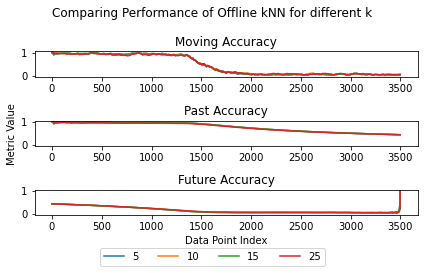

In [163]:
fig, axs = plt.subplots(3, 1,sharey='col')
fig.subplots_adjust(bottom=0.30)
axs[0].plot(mova)
axs[0].plot(mova2)
axs[0].plot(mova3)
axs[0].plot(mova4)
axs[0].set_title("Moving Accuracy")
axs[1].plot(pa)
axs[1].plot(pa2)
axs[1].plot(pa3)
axs[1].plot(pa4)
axs[1].set_title("Past Accuracy")
axs[1].set_ylabel("Metric Value")
axs[2].plot(fa)
axs[2].plot(fa2)
axs[2].plot(fa3)
axs[2].plot(fa4)
axs[2].set_title("Future Accuracy")
axs[2].set_xlabel("Data Point Index")
plt.legend(['5','10','15', '25'], loc="upper center", ncol=4,bbox_to_anchor=(0.5, 0.16),bbox_transform=fig.transFigure)
fig.suptitle('Comparing Performance of Offline kNN for different k', fontsize=12)
fig.tight_layout()
plt.savefig("output10.png", dpi=500)

In [170]:
#kNN parameter
y_pred1, y_true1 = kNNypredtrue(data, 5, window, leaf)
y_pred2, y_true2 = kNNypredtrue(data, 10, window, leaf)
y_pred3, y_true3 = kNNypredtrue(data, 15, window, leaf)
y_pred4, y_true4 = kNNypredtrue(data, 25, window, leaf)

if classes == 2:
    mova, pa, fa, movp, pp, fp, movr, pr, fr, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, movp2, pp2, fp2, movr2, pr2, fr2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova3, pa3, fa3, movp3, pp3, fp3, movr3, pr3, fr3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
    mova4, pa4, fa4, movp4, pp4, fp4, movr4, pr4, fr4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)
else:
    mova, pa, fa, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova3, pa3, fa3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
    mova4, pa4, fa4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)

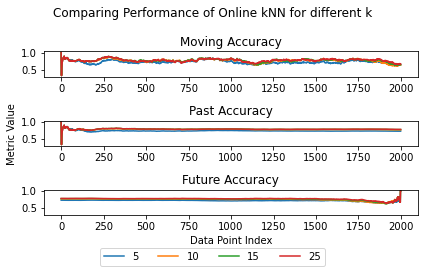

In [171]:
fig, axs = plt.subplots(3, 1,sharey='col')
fig.subplots_adjust(bottom=0.30)
axs[0].plot(mova)
axs[0].plot(mova2)
axs[0].plot(mova3)
axs[0].plot(mova4)
axs[0].set_title("Moving Accuracy")
axs[1].plot(pa)
axs[1].plot(pa2)
axs[1].plot(pa3)
axs[1].plot(pa4)
axs[1].set_title("Past Accuracy")
axs[1].set_ylabel("Metric Value")
axs[2].plot(fa)
axs[2].plot(fa2)
axs[2].plot(fa3)
axs[2].plot(fa4)
axs[2].set_title("Future Accuracy")
axs[2].set_xlabel("Data Point Index")
plt.legend(['5','10','15', '25'], loc="upper center", ncol=4,bbox_to_anchor=(0.5, 0.16),bbox_transform=fig.transFigure)
fig.suptitle('Comparing Performance of Online kNN for different k', fontsize=12)
fig.tight_layout()
plt.savefig("output9.png", dpi=500)

In [14]:
y_pred1, y_true1 = ARFypredtrue(data)
y_pred2, y_true2 = MFCypredtrue(data, classes)
y_pred3, y_true3 = kNNypredtrue(data, neighbours, window, leaf)
y_pred4, y_true4 = bayesypredtrue(data)

y_pred5, y_true5 = OffRFtest(data, train_size)
y_pred6, y_true6 = OffkNNtest(data, train_size, k2)
y_pred7, y_true7 = OffBayestest(data, train_size)


if classes == 2:
    mova, pa, fa, movp, pp, fp, movr, pr, fr, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, movp2, pp2, fp2, movr2, pr2, fr2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova3, pa3, fa3, movp3, pp3, fp3, movr3, pr3, fr3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
    mova4, pa4, fa4, movp4, pp4, fp4, movr4, pr4, fr4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)
    mova5, pa5, fa5, movp5, pp5, fp5, movr5, pr5, fr5, var5, mm5 = calc(y_true5, y_pred5, classes, window2)
    mova6, pa6, fa6, movp6, pp6, fp6, movr6, pr6, fr6, var6, mm6 = calc(y_true6, y_pred6, classes, window2)
    mova7, pa7, fa7, movp7, pp7, fp7, movr7, pr7, fr7, var7, mm7 = calc(y_true7, y_pred7, classes, window2)
else:
    mova, pa, fa, var, mm = calc(y_true1, y_pred1, classes, window2)
    mova2, pa2, fa2, var2, mm2 = calc(y_true2, y_pred2, classes, window2)
    mova3, pa3, fa3, var3, mm3 = calc(y_true3, y_pred3, classes, window2)
    mova4, pa4, fa4, var4, mm4 = calc(y_true4, y_pred4, classes, window2)
    mova5, pa5, fa5, var5, mm5 = calc(y_true5, y_pred5, classes, window2)
    mova6, pa6, fa6, var6, mm6 = calc(y_true6, y_pred6, classes, window2)
    mova7, pa7, fa7, var7, mm7 = calc(y_true7, y_pred7, classes, window2)


## Code to produce plots from results

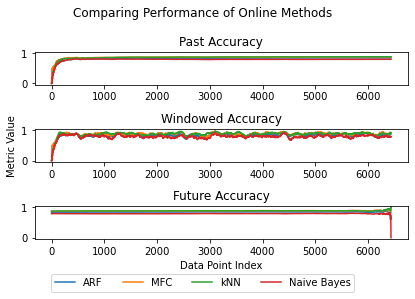

In [205]:
#no offline plots
l = len(y_pred1)

if classes == 2:
    fig, axs = plt.subplots(3, 3,sharey='all')
    axs[0, 1].plot(mova)
    axs[0, 1].plot(mova2)
    axs[0, 1].plot(mova3)
    axs[0, 1].plot(mova4)
    axs[0, 1].set_title("Windowed Accuracy")
    axs[0, 0].plot(pa)
    axs[0, 0].plot(pa2)
    axs[0, 0].plot(pa3)
    axs[0, 0].plot(pa4)
    axs[0, 0].set_title("Past Accuracy")
    axs[0, 2].plot(fa)
    axs[0, 2].plot(fa2)
    axs[0, 2].plot(fa3)
    axs[0, 2].plot(fa4)
    axs[0, 2].set_title("Future Accuracy")
    axs[1, 1].plot(movp)
    axs[1, 1].plot(movp2)
    axs[1, 1].plot(movp3)
    axs[1, 1].plot(movp4)
    axs[1, 1].set_title("Windowed Precision")
    axs[1, 0].plot(pp)
    axs[1, 0].plot(pp2)
    axs[1, 0].plot(pp3)
    axs[1, 0].plot(pp4)
    axs[1, 0].set_title("Past Precision")
    axs[1, 0].set_ylabel("Metric Value")
    axs[1, 2].plot(fp)
    axs[1, 2].plot(fp2)
    axs[1, 2].plot(fp3)
    axs[1, 2].plot(fp4)
    axs[1, 2].set_title("Future Precision")
    axs[2, 0].plot(pr)
    axs[2, 0].plot(pr2)
    axs[2, 0].plot(pr3)
    axs[2, 0].plot(pr4)
    axs[2, 0].set_title("Past Recall")
    axs[2, 2].plot(fr)
    axs[2, 2].plot(fr2)
    axs[2, 2].plot(fr3)
    axs[2, 2].plot(fr4)
    axs[2, 2].set_title("Future Recall")
    axs[2, 1].plot(movr)
    axs[2, 1].plot(movr2)
    axs[2, 1].plot(movr3)
    axs[2, 1].plot(movr4)
    axs[2, 1].set_title("Windowed Recall")
    axs[2, 1].set_xlabel('Data Point Index')
    axs = axs.T.flatten()
    fig.legend(['ARF','MFC','kNN', 'Naive Bayes'],loc='lower center',ncol=4,prop={'size': 6})
    fig.suptitle('Comparing Performance of Online Methods',fontsize=12)
    fig.tight_layout()
    plt.savefig("output7.png", dpi=500)


else:
    fig, axs = plt.subplots(3, 1, sharey='col')
    axs[1].plot(mova)
    axs[1].plot(mova2)
    axs[1].plot(mova3)
    axs[1].plot(mova4)
    axs[1].set_title("Windowed Accuracy")
    axs[1].set_ylabel("Metric Value")
    axs[0].plot(pa)
    axs[0].plot(pa2)
    axs[0].plot(pa3)
    axs[0].plot(pa4)
    axs[0].set_title("Past Accuracy")
    axs[2].plot(fa)
    axs[2].plot(fa2)
    axs[2].plot(fa3)
    axs[2].plot(fa4)
    axs[2].set_title("Future Accuracy")
    axs[2].set_xlabel("Data Point Index")
    plt.legend(['ARF','MFC','kNN', 'Naive Bayes'],loc="upper center", ncol=4,bbox_to_anchor=(0.5, 0.07),bbox_transform=fig.transFigure)
    fig.suptitle('Comparing Performance of Online Methods', fontsize=12)
    fig.tight_layout()
    plt.savefig("output7.png", dpi=500)
#fig, axs = plt.subplots(3, 1,sharey='col')
#fig.subplots_adjust(bottom=0.25)
#axs[1].plot(var)
#axs[1].plot(var2)
#axs[1].plot(var3)
#axs[1].plot(var4)
#axs[1].set_title("Windowed Variance")
#axs[1].set_ylabel("Metric Value")
#axs[0].plot(mm)
#axs[0].plot(mm2)
#axs[0].plot(mm3)
#axs[0].plot(mm4)
#axs[0].set_title("Maximum Distance")
#axs[2].plot(fa)
#axs[2].plot(fa2)
#axs[2].plot(fa3)
#axs[2].plot(fa4)
#axs[2].set_xlabel("Data Point Index")
#axs[2].set_title("Future Accuracy")
#plt.legend(['ARF','MFC','kNN', 'Naive Bayes'],loc="upper center", ncol=4,bbox_to_anchor=(0.5, 0.16),bbox_transform=fig.transFigure)
#fig.tight_layout()
#plt.savefig("output8.png", dpi=500)

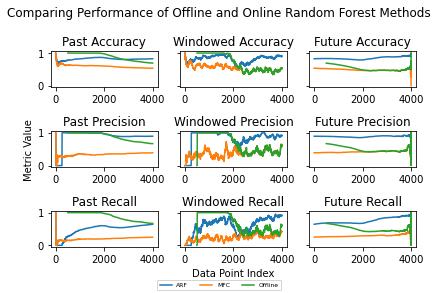

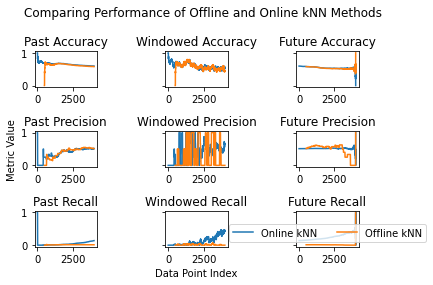

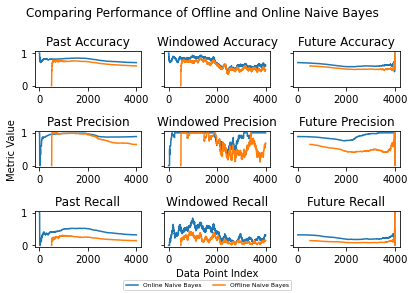

In [90]:
#offline 
l = len(y_pred1)
l2 = len(y_pred5)


if classes == 2:
    fig, axs = plt.subplots(3, 3,sharey='all')
    axs[0, 1].plot(mova)
    axs[0, 1].plot(mova2)
    axs[0, 1].plot(np.arange(l-l2,l,1),mova5)
    axs[0, 1].set_title("Windowed Accuracy")
    axs[0, 0].plot(pa)
    axs[0, 0].plot(pa2)
    axs[0, 0].plot(np.arange(l-l2,l,1),pa5)
    axs[0, 0].set_title("Past Accuracy")
    axs[0, 2].plot(fa)
    axs[0, 2].plot(fa2)
    axs[0, 2].plot(np.arange(l-l2,l,1),fa5)
    axs[0, 2].set_title("Future Accuracy")
    axs[1, 1].plot(movp)
    axs[1, 1].plot(movp2)
    axs[1, 1].plot(np.arange(l-l2,l,1),movp5)
    axs[1, 1].set_title("Windowed Precision")
    axs[1, 0].plot(pp)
    axs[1, 0].plot(pp2)
    axs[1, 0].plot(np.arange(l-l2,l,1),pp5)
    axs[1, 0].set_title("Past Precision")
    axs[1, 0].set_ylabel("Metric Value")
    axs[1, 2].plot(fp)
    axs[1, 2].plot(fp2)
    axs[1, 2].plot(np.arange(l-l2,l,1),fp5)
    axs[1, 2].set_title("Future Precision")
    axs[2, 1].plot(movr)
    axs[2, 1].plot(movr2)
    axs[2, 1].plot(np.arange(l-l2,l,1),movp5)
    axs[2, 1].set_title("Windowed Recall")
    axs[2, 1].set_xlabel('Data Point Index')
    axs[2, 0].plot(pr)
    axs[2, 0].plot(pr2)
    axs[2, 0].plot(np.arange(l-l2,l,1),pp5)
    axs[2, 0].set_title("Past Recall")
    axs[2, 2].plot(fr)
    axs[2, 2].plot(fr2)
    axs[2, 2].plot(np.arange(l-l2,l,1),fp5)
    axs[2, 2].set_title("Future Recall")
    fig.legend(['ARF','MFC','Offline'],loc='lower center',ncol=3,prop={'size': 6})
    fig.suptitle('Comparing Performance of Offline and Online Random Forest Methods', fontsize=12)
    fig.tight_layout()
    plt.savefig("output1.png", dpi=300)

    fig, axs = plt.subplots(3, 3,sharey='all')
    axs[0, 1].plot(mova3)
    axs[0, 1].plot(np.arange(l-l2,l,1),mova6)
    axs[0, 1].set_title("Windowed Accuracy")
    axs[0, 0].plot(pa3)
    axs[0, 0].plot(np.arange(l-l2,l,1),pa6)
    axs[0, 0].set_title("Past Accuracy")
    axs[0, 2].plot(fa3)
    axs[0, 2].plot(np.arange(l-l2,l,1),fa6)
    axs[0, 2].set_title("Future Accuracy")
    axs[1, 1].plot(movp3)
    axs[1, 1].plot(np.arange(l-l2,l,1),movp6)
    axs[1, 1].set_title("Windowed Precision")
    axs[1, 0].plot(pp3)
    axs[1, 0].plot(np.arange(l-l2,l,1),pp6)
    axs[1, 0].set_title("Past Precision")
    axs[1, 0].set_ylabel("Metric Value")
    axs[1, 2].plot(fp3)
    axs[1, 2].plot(np.arange(l-l2,l,1),fp6)
    axs[1, 2].set_title("Future Precision")
    axs[2, 1].plot(movr3)
    axs[2, 1].plot(np.arange(l-l2,l,1),movr6)
    axs[2, 1].set_title("Windowed Recall")
    axs[2, 1].set_xlabel('Data Point Index')
    axs[2, 0].plot(pr3)
    axs[2, 0].plot(np.arange(l-l2,l,1),pr6)
    axs[2, 0].set_title("Past Recall")
    axs[2, 2].plot(fr3)
    axs[2, 2].plot(np.arange(l-l2,l,1),fr6)
    axs[2, 2].set_title("Future Recall")
    plt.legend(['Online kNN','Offline kNN'],loc='lower center',ncol=2, prop={'size': 6})
    fig.suptitle('Comparing Performance of Offline and Online kNN Methods', fontsize=12)
    fig.tight_layout()
    plt.savefig("output2.png", dpi=300)
 
    fig, axs = plt.subplots(3, 3,sharey='all')
    axs[0, 1].plot(mova4)
    axs[0, 1].plot(np.arange(l-l2,l,1),mova7)
    axs[0, 1].set_title("Windowed Accuracy")
    axs[0, 0].plot(pa4)
    axs[0, 0].plot(np.arange(l-l2,l,1),pa7)
    axs[0, 0].set_title("Past Accuracy")
    axs[0, 2].plot(fa4)
    axs[0, 2].plot(np.arange(l-l2,l,1),fa7)
    axs[0, 2].set_title("Future Accuracy")
    axs[1, 1].plot(movp4)
    axs[1, 1].plot(np.arange(l-l2,l,1),movp7)
    axs[1, 1].set_title("Windowed Precision")
    axs[1, 0].plot(pp4)
    axs[1, 0].plot(np.arange(l-l2,l,1),pp7)
    axs[1, 0].set_title("Past Precision")
    axs[1, 0].set_ylabel("Metric Value")
    axs[1, 2].plot(fp4)
    axs[1, 2].plot(np.arange(l-l2,l,1),fp7)
    axs[1, 2].set_title("Future Precision")
    axs[2, 1].plot(movr4)
    axs[2, 1].plot(np.arange(l-l2,l,1),movr7)
    axs[2, 1].set_title("Windowed Recall")
    axs[2, 1].set_xlabel('Data Point Index')
    axs[2, 0].plot(pr4)
    axs[2, 0].plot(np.arange(l-l2,l,1),pr7)
    axs[2, 0].set_title("Past Recall")
    axs[2, 2].plot(fr4)
    axs[2, 2].plot(np.arange(l-l2,l,1),fr7)
    axs[2, 2].set_title("Future Recall")
    fig.legend(['Online Naive Bayes','Offline Naive Bayes'],loc='lower center',ncol=2,prop={'size': 6})
    fig.suptitle('Comparing Performance of Offline and Online Naive Bayes', fontsize=12)
    fig.tight_layout()
    plt.savefig("output3.png", dpi=300)

else:
    fig, axs = plt.subplots(3, 1,sharey='col')
    axs[1].plot(mova)
    axs[1].plot(mova2)
    axs[1].plot(np.arange(l-l2,l,1),mova5)
    axs[1].set_title("Windowed Accuracy")
    axs[1].set_ylabel("Metric Value")
    axs[0].plot(pa)
    axs[0].plot(pa2)
    axs[0].plot(np.arange(l-l2,l,1),pa5)
    axs[0].set_title("Past Accuracy")
    axs[2].plot(fa)
    axs[2].plot(fa2)
    axs[2].plot(np.arange(l-l2,l,1),fa5)
    axs[2].set_xlabel("Data Point Index")
    axs[2].set_title("Future Accuracy")
    fig.legend(['ARF','MFC','Offline'],loc="upper center", ncol=3,bbox_to_anchor=(0.5, 0.05),bbox_transform=fig.transFigure)
    fig.suptitle('Comparing Performance of Offline and Online Random Forest Methods', fontsize=12)
    fig.tight_layout()
    plt.savefig("output1.png", dpi=300, bbox_inches='tight')

    fig, axs = plt.subplots(3, 1,sharey='col')
    axs[1].plot(mova3)
    axs[1].plot(np.arange(l-l2,l,1),mova6)
    axs[1].set_title("Windowed Accuracy")
    axs[1].set_ylabel("Metric Value")
    axs[0].plot(pa3)
    axs[0].plot(np.arange(l-l2,l,1),pa6)
    axs[0].set_title("Past Accuracy")
    axs[2].set_xlabel("Data Point Index")
    axs[2].plot(fa3)
    axs[2].plot(np.arange(l-l2,l,1),fa6)
    axs[2].set_title("Future Accuracy")
    fig.legend(['Online kNN','Offline kNN'],loc="upper center", ncol=2,bbox_to_anchor=(0.5, 0.05),bbox_transform=fig.transFigure)
    fig.suptitle('Comparing Performance of Offline and Online kNN Methods', fontsize=12)
    fig.tight_layout()
    plt.savefig("output2.png", dpi=300, bbox_inches='tight')

    fig, axs = plt.subplots(3, 1,sharey='col')
    axs[1].plot(mova4)
    axs[1].plot(np.arange(l-l2,l,1),mova7)
    axs[1].set_title("Windowed Accuracy")
    axs[1].set_ylabel("Metric Value")
    axs[0].plot(pa4)
    axs[0].plot(np.arange(l-l2,l,1),pa7)
    axs[0].set_title("Past Accuracy")
    axs[2].set_xlabel("Data Point Index")
    axs[2].plot(fa4)
    axs[2].plot(np.arange(l-l2,l,1),fa7)
    axs[2].set_title("Future Accuracy")
    fig.legend(['Online Naive Bayes','Offline Naive Bayes'],loc="upper center", ncol=2,bbox_to_anchor=(0.5, 0.05),bbox_transform=fig.transFigure)
    fig.suptitle('Comparing Performance of Offline and Online Naive Bayes', fontsize=12)
    fig.tight_layout()
    plt.savefig("output3.png", dpi=300, bbox_inches='tight')
#fig, axs = plt.subplots(3, 1)
#axs[0].plot(var)
#axs[0].plot(var2)
#axs[0].plot(np.arange(l-l2,l,1),var5)
#axs[0].set_title("Moving Variance")
#axs[1].plot(mm)
#axs[1].plot(mm2)
#axs[1].plot(np.arange(l-l2,l,1),mm5)
#axs[1].set_title("Maximum Distance")
#axs[2].plot(fa)
#axs[2].plot(fa2)
#axs[2].plot(np.arange(l-l2,l,1),fa5)
#axs[2].set_title("Future Accuracy")
#fig.tight_layout()
#fig.legend(['ARF','MFC','Offline'],loc="upper center", ncol=3,bbox_to_anchor=(0.5, 0.16),bbox_transform=fig.transFigure)
#plt.savefig("output4.png", dpi=500)

#fig, axs = plt.subplots(3, 1)
#axs[0].plot(var3)
#axs[0].plot(np.arange(l-l2,l,1),var6)
#axs[0].set_title("Moving Variance")
#axs[1].plot(mm3)
#axs[1].plot(np.arange(l-l2,l,1),mm6)
#axs[1].set_title("Maximum Distance")
#axs[2].plot(fa3)
#axs[2].plot(np.arange(l-l2,l,1),fa6)
#axs[2].set_title("Future Accuracy")
#fig.tight_layout()
#fig.legend(['Online kNN','Offline kNN'],loc="upper center", ncol=2,bbox_to_anchor=(0.5, 0.16),bbox_transform=fig.transFigure)
#plt.savefig("output5.png", dpi=500)

#fig, axs = plt.subplots(3, 1)
#axs[0].plot(var4)
#axs[0].plot(np.arange(l-l2,l,1),var7)
#axs[0].set_title("Moving Variance")
#axs[1].plot(mm4)
#axs[1].plot(np.arange(l-l2,l,1),mm7)
#axs[1].set_title("Maximum Distance")
#axs[2].plot(fa4)
#axs[2].plot(np.arange(l-l2,l,1),fa7)
#axs[2].set_title("Future Accuracy")
#fig.tight_layout()
#fig.legend(['Online Naive Bayes','Offline Naive Bayes'],loc="upper center", ncol=2,bbox_to_anchor=(0.5, 0.16),bbox_transform=fig.transFigure)
#plt.savefig("output6.png", dpi=500)

## Short example of chapter 7, how to detect stability via binomial method

In [142]:
from scipy.stats import binom
def binomtest(y_pred,y_true, w):
    l = len(y_pred)
    k = np.zeros(l-w+1)
    for j in range(l-w+1):
        y1 = accuracy_score(y_pred[j:j+int(w/2)],y_true[j:j+int(w/2)])
        y2 = accuracy_score(y_pred[j+int(w/2):j+int(w)],y_true[j+int(w/2):j+int(w)])*w/2
        k[j] = binom.cdf(y2,w/2,y1)
    return k

In [143]:
def last2(y,w, t,t2):
    l = len(y)
    k = np.zeros(l)
    for j in range(l-w+1):
        if np.mean(y[j:j+w]<t) >= t2:
            k[j:j+w]=1
    return k

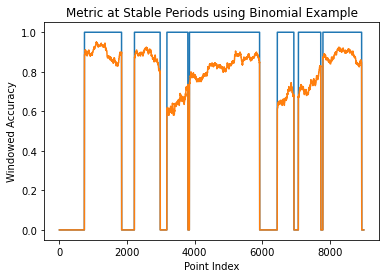

In [317]:
#stability plot fig24 in work

x = binomtest(y_pred1, y_true1, 300)
x = np.abs(x-0.5)
k4 = last2(x,200,0.475,0.7)
z4 = np.zeros(9000)
z4[-len(k4):] = k4
plt.plot(z4)
plt.xlabel('Point Index')
plt.ylabel('Stable (1), Unstable (0)')
plt.title('Binomial Model Example')
plt.savefig('fig102.jpg', dpi=500)
plt.plot(z4*mova2)
plt.xlabel('Point Index')
plt.ylabel('Windowed Accuracy')
plt.title('Metric at Stable Periods using Binomial Example')
plt.savefig('fig103.jpg', dpi=500)